In [91]:
import pandas as pd
import numpy as np
from scipy import stats

In [11]:
# Directly loading data through library

# import numpy as np
# import pandas as pd
# from sklearn.datasets import load_iris

# # save load_iris() sklearn dataset to iris
# # if you'd like to check dataset type use: type(load_iris())
# # if you'd like to view list of attributes use: dir(load_iris())
# iris = load_iris()

# # np.c_ is the numpy concatenate function
# # which is used to concat iris['data'] and iris['target'] arrays 
# # for pandas column argument: concat iris['feature_names'] list
# # and string list (in this case one string); you can make this anything you'd like..  
# # the original dataset would probably call this ['Species']
# data1 = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
#                      columns= iris['feature_names'] + ['target'])

In [14]:
ls

 Volume in drive F is COLLEGE
 Volume Serial Number is 14C4-D5AB

 Directory of F:\BE\DA\Assignment1

22-07-2021  11:44    <DIR>          .
22-07-2021  11:44    <DIR>          ..
20-07-2021  14:38    <DIR>          .ipynb_checkpoints
22-07-2021  11:44             2,113 Assignment 1.ipynb
22-07-2021  11:43             5,107 Iris.csv
               2 File(s)          7,220 bytes
               3 Dir(s)  214,611,812,352 bytes free


In [15]:
iris = pd.read_csv('Iris.csv')

In [16]:
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [18]:
print(iris.columns)

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


## Feautres 

#### There are 5 features

#### Type of data:
<br>
SepalLengthCm-Numerical<br>
SepalWidthCm-Numerical<br>
PetalLengthCm-Numerical<br>
PetalWidthCm-Numerical<br>
Species-Categorical<br>

## Summary statistics 

In [23]:
iris = iris.drop(columns=['Id'])

In [87]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [34]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### 1) Mean & Median

In [24]:
iris.groupby('Species').agg(['mean', 'median'])

SepalLengthCm        SepalWidthCm        PetalLengthCm         \
                         mean median         mean median          mean median   
Species                                                                         
Iris-setosa             5.006    5.0        3.418    3.4         1.464   1.50   
Iris-versicolor         5.936    5.9        2.770    2.8         4.260   4.35   
Iris-virginica          6.588    6.5        2.974    3.0         5.552   5.55   

                PetalWidthCm         
                        mean median  
Species                              
Iris-setosa            0.244    0.2  
Iris-versicolor        1.326    1.3  
Iris-virginica         2.026    2.0

### 2) Minimum & Maximum Value

In [25]:
iris.min()

SepalLengthCm            4.3
SepalWidthCm             2.0
PetalLengthCm            1.0
PetalWidthCm             0.1
Species          Iris-setosa
dtype: object

In [26]:
iris.max()

SepalLengthCm               7.9
SepalWidthCm                4.4
PetalLengthCm               6.9
PetalWidthCm                2.5
Species          Iris-virginica
dtype: object

In [30]:
iris.groupby('Species').min()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,4.3,2.3,1.0,0.1
Iris-versicolor,4.9,2.0,3.0,1.0
Iris-virginica,4.9,2.2,4.5,1.4


In [31]:
iris.groupby('Species').max()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,5.8,4.4,1.9,0.6
Iris-versicolor,7.0,3.4,5.1,1.8
Iris-virginica,7.9,3.8,6.9,2.5


### 3) Standard Deviation

In [28]:
iris.groupby('Species').std()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,0.352490,0.381024,0.173511,0.107210
Iris-versicolor,0.516171,0.313798,0.469911,0.197753
Iris-virginica,0.635880,0.322497,0.551895,0.274650


### 4) Variance

In [36]:
iris.var()

SepalLengthCm    0.685694
SepalWidthCm     0.188004
PetalLengthCm    3.113179
PetalWidthCm     0.582414
dtype: float64

In [40]:
iris.groupby('Species').var()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,0.124249,0.145180,0.030106,0.011494
Iris-versicolor,0.266433,0.098469,0.220816,0.039106
Iris-virginica,0.404343,0.104004,0.304588,0.075433


### 5) Co-relation

In [41]:
iris.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


## Histogram

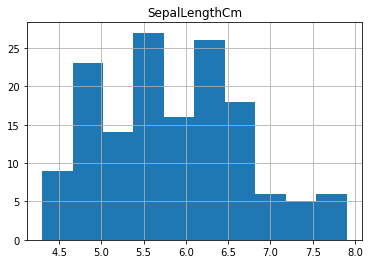

In [43]:
hist = iris.hist(column = 'SepalLengthCm')

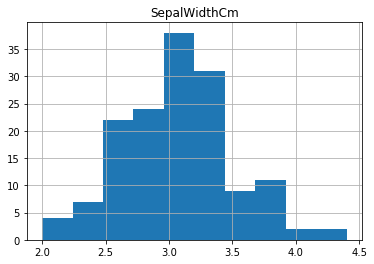

In [47]:
hist = iris.hist(column = 'SepalWidthCm')

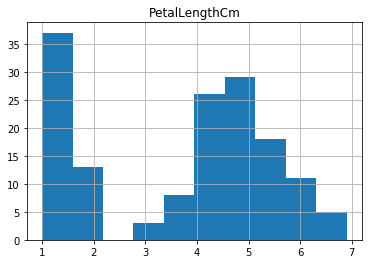

In [48]:
hist = iris.hist(column = 'PetalLengthCm')

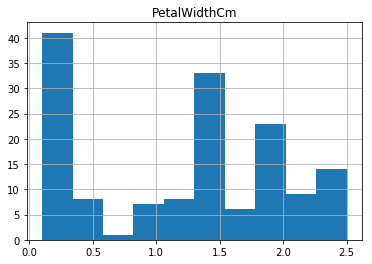

In [49]:
hist = iris.hist(column = 'PetalWidthCm')

## Boxplot

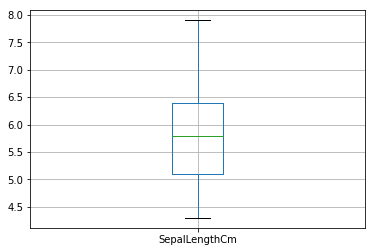

In [52]:
boxplot = iris.boxplot(column=['SepalLengthCm'])

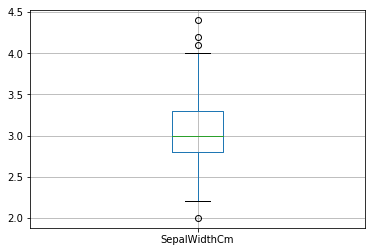

In [55]:
boxplot = iris.boxplot(column=['SepalWidthCm'])

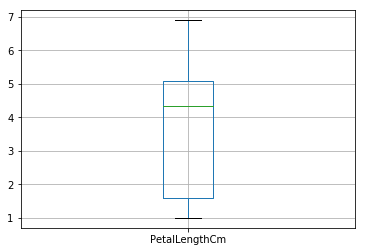

In [56]:
boxplot = iris.boxplot(column=['PetalLengthCm'])

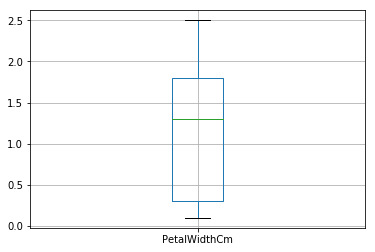

In [57]:
boxplot = iris.boxplot(column=['PetalWidthCm'])

In [60]:
col = list(iris.columns)

In [62]:
col

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']

In [63]:
col.remove('Species')
print(col)

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']


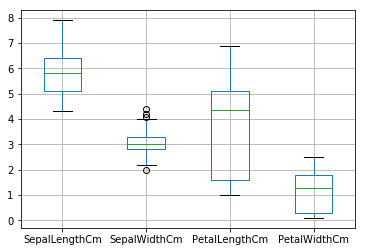

In [64]:
boxplot = iris.boxplot(column=col)

In [88]:
print(np.where(iris['SepalWidthCm']>4))

(array([15, 32, 33], dtype=int64),)


In [89]:
print(np.where(iris['SepalWidthCm']<2.5))

(array([ 41,  53,  57,  60,  62,  68,  80,  81,  87,  93, 119], dtype=int64),)


In [93]:
iris_new = iris.drop(columns = 'Species')

In [94]:
#Z Score
z = np.abs(stats.zscore(iris_new))
print(z)

[[9.00681170e-01 1.03205722e+00 1.34127240e+00 1.31297673e+00]
 [1.14301691e+00 1.24957601e-01 1.34127240e+00 1.31297673e+00]
 [1.38535265e+00 3.37848329e-01 1.39813811e+00 1.31297673e+00]
 [1.50652052e+00 1.06445364e-01 1.28440670e+00 1.31297673e+00]
 [1.02184904e+00 1.26346019e+00 1.34127240e+00 1.31297673e+00]
 [5.37177559e-01 1.95766909e+00 1.17067529e+00 1.05003079e+00]
 [1.50652052e+00 8.00654259e-01 1.34127240e+00 1.18150376e+00]
 [1.02184904e+00 8.00654259e-01 1.28440670e+00 1.31297673e+00]
 [1.74885626e+00 3.56360566e-01 1.34127240e+00 1.31297673e+00]
 [1.14301691e+00 1.06445364e-01 1.28440670e+00 1.44444970e+00]
 [5.37177559e-01 1.49486315e+00 1.28440670e+00 1.31297673e+00]
 [1.26418478e+00 8.00654259e-01 1.22754100e+00 1.31297673e+00]
 [1.26418478e+00 1.24957601e-01 1.34127240e+00 1.44444970e+00]
 [1.87002413e+00 1.24957601e-01 1.51186952e+00 1.44444970e+00]
 [5.25060772e-02 2.18907205e+00 1.45500381e+00 1.31297673e+00]
 [1.73673948e-01 3.11468391e+00 1.28440670e+00 1.050030

In [95]:
iris_new = iris_new[(z < 3).all(axis=1)]

In [100]:
print(iris.shape)
print(iris_new.shape)

(150, 5)
(149, 4)


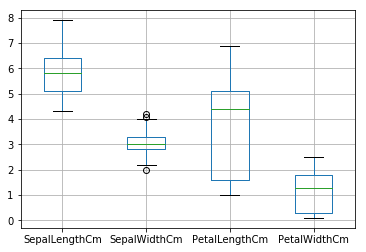

In [101]:
col = list(iris_new.columns)
boxplot = iris_new.boxplot(column=col)